In [ ]:
 pip install -U scikit-fuzzy


     |████████████████████████████████| 1.0MB 9.2MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=e2b86e313b9bc3c92cf38280a90310ca4009f16ab0af8491028f5a95738bedca
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
#Variables
#yN = Loan_Status
#x6N = ApplicantIncome
#x8N = LoanAmount
#x9N = Loan_Amount_Term

# Universo de discurso
y = ctrl.Consequent(np.arange(0, 1, 0.01),'Aceptacion')
x_ingreso = ctrl.Antecedent(np.arange(150, 63337, 1),'ingreso')
x_monto = ctrl.Antecedent(np.arange(9, 650, 1),'monto')
x_meses = ctrl.Antecedent(np.arange(12, 480, 1),'meses')


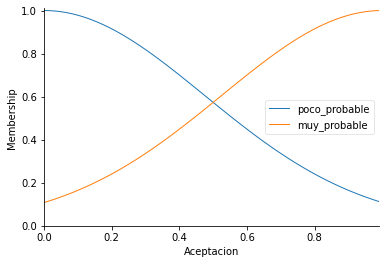

In [ ]:
#Funciones de pertenencia

#Aceptación del prestamo
y['poco_probable'] = fuzz.gaussmf(y.universe, 0, 0.474)
y['muy_probable'] = fuzz.gaussmf(y.universe, 1, 0.474)
y.view()


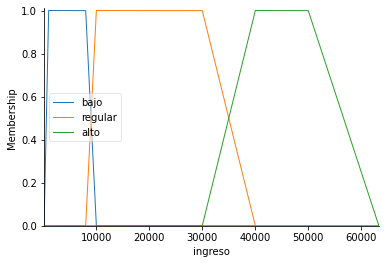

In [ ]:
#Ingreso mensual en cientos de Ruphias
x_ingreso['bajo']=fuzz.trapmf(x_ingreso.universe,[150,1000,8000,10000])
x_ingreso['regular']=fuzz.trapmf(x_ingreso.universe,[8000,10000,30000,40000])
x_ingreso['alto']=fuzz.trapmf(x_ingreso.universe,[30000,40000,50000,63337])
x_ingreso.view()


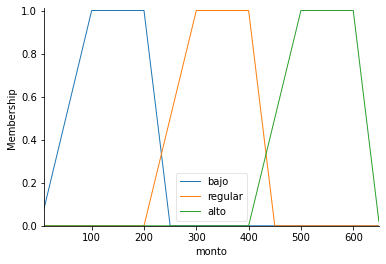

In [ ]:
#Monto en Lakhs (*100000)
x_monto['bajo']=fuzz.trapmf(x_monto.universe,[1,100,200,250])
x_monto['regular']=fuzz.trapmf(x_monto.universe,[200,300,400,450])
x_monto['alto']=fuzz.trapmf(x_monto.universe,[400,500,600,650])
x_monto.view()


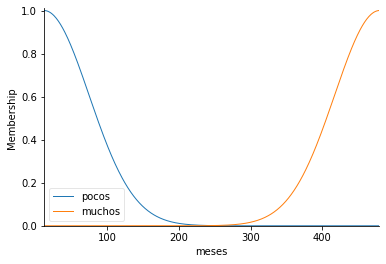

In [ ]:
#Meses
x_meses['pocos'] = fuzz.gaussmf(x_meses.universe, 12, 62.78298)
x_meses['muchos'] = fuzz.gaussmf(x_meses.universe, 480, 62.78298)
x_meses.view()

In [ ]:
#Si el ingreso es bajo O el monto es bajo Y muchos meses ENTONCES muy probable
rule1 = ctrl.Rule(x_ingreso['bajo'] | x_monto['bajo'] & x_meses['muchos'], y['muy_probable'])
#Si el ingreso es regular O el monto regular Y pocos meses ENTONCES poco probable
rule2 = ctrl.Rule(x_ingreso['regular'] | x_monto['regular'] & x_meses['pocos'], y['poco_probable'])
#Si el ingreso es alto Y el monto es alto ENTONCES muy probable
rule3 = ctrl.Rule(x_ingreso['alto'] & x_monto['alto'], y['muy_probable'])
#Si el ingreso es regular o alto Y el monto es bajo ENTONCES poco probable
rule4 = ctrl.Rule(x_ingreso['regular'] | x_ingreso['alto'] & x_monto['bajo'], y['poco_probable'])
# Si el ingreso es bajo Y el monto alto ENTONCES poco probable
rule5 = ctrl.Rule(x_ingreso['bajo'] & x_monto['alto'], y['poco_probable'])

In [ ]:
aceptacion_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
aceptacion = ctrl.ControlSystemSimulation(aceptacion_ctrl)

In [ ]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
#matriz = df2.to_numpy()
aceptacion.input['ingreso'] = 500 
aceptacion.input['monto'] =  100
aceptacion.input['meses'] =  160

aceptacion.compute()

0.5627458030541722


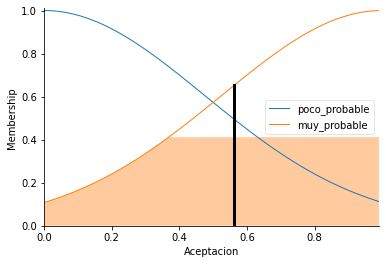

In [ ]:
print (aceptacion.output['Aceptacion'])
y.view(sim=aceptacion)

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datoss.csv to datoss.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['datoss.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:

matriz = df2.to_numpy()
respuestas =[]
for i in range(len(matriz)):
  aceptacion.input['ingreso'] = matriz[i][0]
  aceptacion.input['monto'] =  matriz[i][1]
  aceptacion.input['meses'] =  matriz[i][2]
  aceptacion.compute()
  respuestas.append(aceptacion.output['Aceptacion'])  

print(respuestas)  

[0.3482995853173259, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.5405447217871051, 0.6308151634454643, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.3482995853173259, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6273471685502657, 0.6443390843428981, 0.6443390843428981, 0.5914581637083904, 0.6443390843428981, 0.6443390843428981, 0.47503783383470183, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981, 0.6443390843428981

In [ ]:
# >0.5 muy problable de que se acepte el préstamo
#<=0.5 poco problable de que se acepte el préstamo

for i in range(len(respuestas)):
  if respuestas[i]<= 0.5:
    respuestas[i] = 0
  else:
    respuestas[i]=1

print(respuestas)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
independientes = []
for i in range(len(matriz)):
  independientes.append(matriz[i][3])  
  if matriz[i][3] == 'Y':
    matriz[i][3] = 1
  else:
    matriz[i][3] = 0


In [ ]:
independientes = []
for i in range(len(matriz)):
  independientes.append(matriz[i][3])  
print(independientes)

[1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
comparacion = []
for i in range(len(matriz)):
  if respuestas[i]==independientes[i]:
    comparacion.append(1)
  else:
    comparacion.append(0)
 

suma = sum(comparacion)
accuracy = sum(comparacion)/len(matriz)
print(accuracy)

0.657608695652174
